# Multi Stock Analysis

Let's work with some multiple stock panel data now. We'll use the same libraries as before, but we'll also introduce `seaborn` - another increasingly popular visualisation library. Again, we'll start with all of our imports.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

Let's load the panel data as normal.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ImperialCollegeLondon/efds-ta-python/refs/heads/main/data/tech_eight.csv")
df.datadate = pd.to_datetime(df.datadate, dayfirst=True)
df

,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod
0,2019-01-02,MSFT,MICROSOFT CORP,35145360,101.12,101.7500,98.9400,99.55
1,2019-01-03,MSFT,MICROSOFT CORP,42111650,97.40,100.1850,97.2000,100.10
2,2019-01-04,MSFT,MICROSOFT CORP,43982700,101.93,102.5100,98.9300,99.72
3,2019-01-07,MSFT,MICROSOFT CORP,35567820,102.06,103.2681,100.9800,101.64
4,2019-01-08,MSFT,MICROSOFT CORP,31322920,102.80,103.9700,101.7134,103.04
...,...,...,...,...,...,...,...,...
6326,2023-03-27,META,META PLATFORMS INC,18466520,202.84,205.8600,201.3600,204.81
6327,2023-03-28,META,META PLATFORMS INC,19110410,200.68,201.0300,197.9000,200.15
6328,2023-03-29,META,META PLATFORMS INC,18825450,205.35,205.7200,202.5355,203.56
6329,2023-03-30,META,META PLATFORMS INC,22568600,207.84,208.0900,202.8200,203.38


Let's say we wanted to visualise the closing prices of all the stocks in our data set. Reshaping our **long** data to **wide** makes plotting *really* straightforward.

*(Note this doesn't follow the best practice of using object oriented Matplotlib, but it's very cool)*

tic           BABA     CRM    META    MSFT   ORCL   UBER
datadate                                                
2019-01-02  136.70  135.55  135.68  101.12  45.22    NaN
2019-01-03  130.60  130.40  131.74   97.40  44.78    NaN
2019-01-04  139.75  137.96  137.95  101.93  46.71    NaN
2019-01-07  143.10  142.22  138.05  102.06  47.45    NaN
2019-01-08  146.79  145.72  142.53  102.80  47.88    NaN
...            ...     ...     ...     ...    ...    ...
2023-03-27   86.12  191.26  202.84  276.38  90.14  30.62
2023-03-28   98.40  192.30  200.68  275.23  89.85  30.07
2023-03-29   99.92  196.64  205.35  280.51  90.62  30.87
2023-03-30  103.38  196.60  207.84  284.05  90.51  31.19
2023-03-31  102.18  199.78  211.94  288.30  92.92  31.70

[1070 rows x 6 columns]


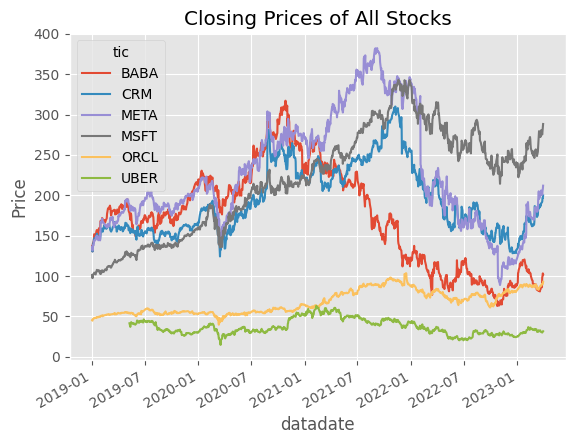

In [3]:
pivot_df = df.pivot(index="datadate", columns='tic', values='prccd')
print(pivot_df)

pivot_df.plot()
plt.title('Closing Prices of All Stocks')
plt.ylabel('Price')
plt.show()

To understand the relationship between the daily returns of different stocks, we've can use a correlation matrix. After finding daily returns and calculating the correlation with `corr()`,  we can use `seaborn`'s `heatmap()` to visualise it.


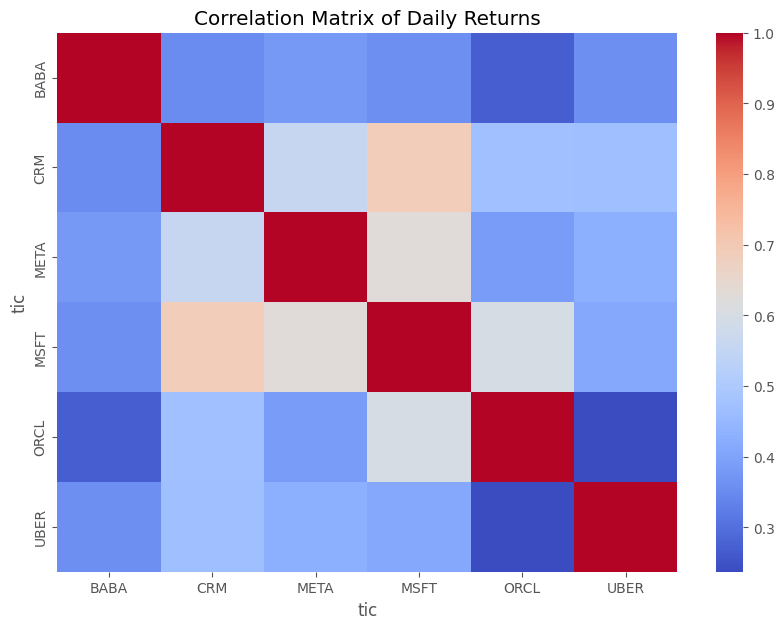

In [4]:
correlation_matrix = pivot_df.pct_change().corr()

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Daily Returns')
plt.show()

We create a regression plot for AAPL's volume traded versus its closing price. This can help visualise if there's any relationship between the returns of two companies. We use seaborn's regplot function which creates a scatter plot and fits a regression line.

In simple regression, we consider two variables - independent (x) and dependent (y). A regression analysis helps us understand how the dependent variable changes with respect to the independent variable.


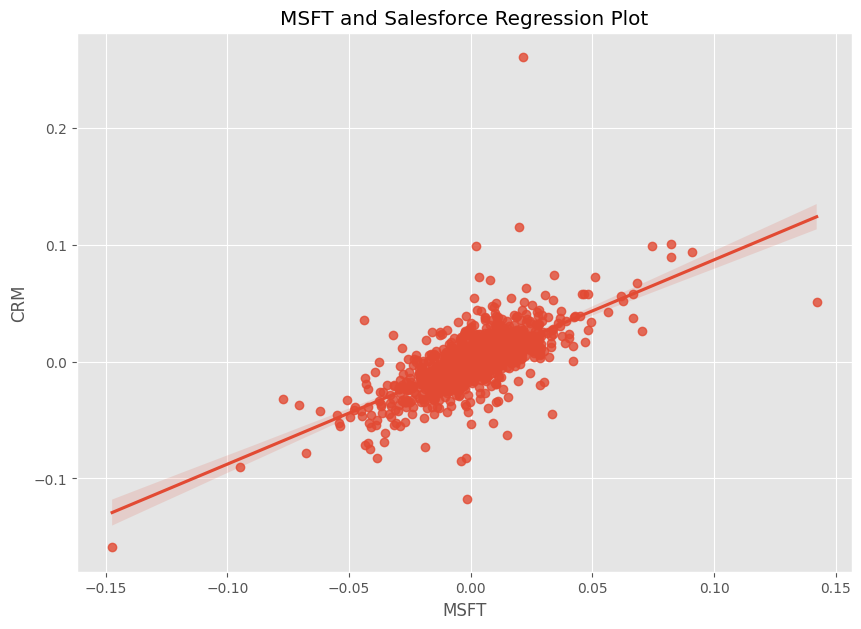

In [5]:
returns_matrix = pivot_df.pct_change()

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=returns_matrix.MSFT, y=returns_matrix.CRM, ax=ax)
ax.set_title('MSFT and Salesforce Regression Plot')
ax.set_xlabel('MSFT')
ax.set_ylabel('CRM')
plt.show()